# Price Per Gallon: Scikit-Learn
Here, we'll try to use scikit-learn to see if we can predict the cost per gallon for fuel based on the values for 2014 and 2015.

In [1]:
# Import sklearn
import sklearn as sk
print(f'Scikit-learn version: {sk.__version__}')

Scikit-learn version: 0.21.3


In [2]:
# Import the modules
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd

## Preping the data
First thing we need to do is to get the inputs into the appropriate format. For this, we will use only columns that are reasonably related to price:
* Week of year (number in range 1-52)
* Market price per barrel of oil

We wont use the shifted week values, because we want to stick as closely as possible to the original data format as possible for simplicity sake.

In [3]:
# Load the data
db = pd.read_pickle('data/data_formatted.pkl')

# Extract the year and week number
db['Year'] = [date.year       for date in db.Date]
db['Week'] = [date.weekofyear for date in db.Date]
db = db[['Year','Week','Price/Barrel','Price/Gal']]

# Remove any invalid entries
db = db.dropna()

# Print column information
db.describe()

,Year,Week,Price/Barrel,Price/Gal
count,116.000000,116.000000,116.000000,116.000000
mean,2015.094828,26.129310,60.491466,2.459517
std,0.903890,16.137739,23.217503,0.522121
min,2013.000000,1.000000,29.440000,1.549000
25%,2014.000000,11.000000,44.572500,2.096500
50%,2015.000000,27.000000,50.870000,2.299000
75%,2016.000000,40.250000,79.240000,2.909000
max,2017.000000,53.000000,107.260000,3.499000


In [4]:
# Extract training and testing samples
train = db[(db.Year >= 2014) & (db.Year <= 2015)]
test  = db[(db.Year == 2016)]

# Split out the features (x) and true values (y)
features = ['Week','Price/Barrel']
output   = 'Price/Gal'
train_x = train[features]
train_y = train[output]
test_x  = test[features]
test_y  = test[output]

## Machine Learning (Scikit-Learn)
Now comes the machine learning part! Let's put it into a [random forest regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor). Because the desired output is a continuous value, I'm using a regression formula here.

In [5]:
# Import the random forest regressor from scikit-learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics  import mean_absolute_error,mean_squared_error

# Construct the model and run the fit
model = RandomForestRegressor(random_state=1, n_estimators=100, criterion='mse', )
model.fit(train_x, train_y)

# Make some predictions form our test data
price_preds = model.predict(test_x)
print(f'Mean absolute error: ${mean_absolute_error(test_y, price_preds):.2f}')
print(f'sqrt(Mean squared error): ${np.sqrt(mean_squared_error(test_y, price_preds)):.2f}')

Mean absolute error: $0.27
sqrt(Mean squared error): $0.28


## Visualizing the predictions
So it looks like we can predict the MPG to within +/- 0.8 MPG. That's pretty fantastic! So what does this look like?

Trend line : Blue
Perfect fit: Black


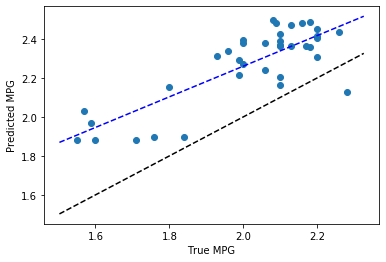

In [6]:
plt.scatter(test_y, price_preds)
plt.xlabel('True MPG')
plt.ylabel('Predicted MPG')

# Add a trend line and best fit line
trend    = np.poly1d( np.polyfit(test_y, price_preds, 1) )
best_fit = np.poly1d([1,0.0])
xlim = plt.xlim()
plt.plot(xlim, trend(xlim),"b--")
plt.plot(xlim, best_fit(xlim), color='black', linestyle='--')
print('Trend line : Blue')
print('Perfect fit: Black')

plt.show()

And just for kicks let's plot the prediction and true values over time

Text(0.5, 0, 'Prediction - True ($/gal)')

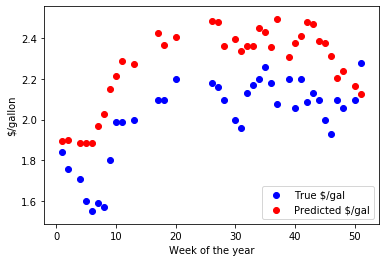

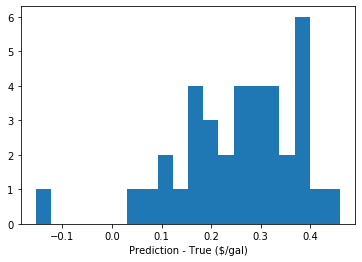

In [7]:
plt.figure()
plt.scatter(test_x.Week, test_y, color='blue', label='True $/gal')
plt.scatter(test_x.Week, price_preds, color='red', label='Predicted $/gal')
plt.xlabel('Week of the year')
plt.ylabel('$/gallon')
leg = plt.legend()

plt.figure()
error = price_preds - test_y
plt.hist(error, bins=20)
plt.xlabel('Prediction - True ($/gal)')

The predictions all seem to over estimate the price per gallon. That's not what we want. So what we need to do is to figure out what it is we need to get the correct value.

... More data is typically the answer, at least in my experience. But we don't have that luxury, so let's try a neural network. See the `price-per-gallon_tf.ipynb` file for an example using TensorFlow.